# Исследование рыночной стоимости объектов недвижимости.

**Цель исследования** — Установить параметры, с помощью которых можно будет построить автоматизированную систему, которая  отследит аномалии и мошенническую деятельность при продаже квартир.

### Шаг 1. Обзор данных

Импортируем библиотеку Pandas.Прочитаем файл с данными для анализа и сохраним его в переменной df. Выведем на экран первые 15 строк таблицы:

In [1]:
import pandas as pd
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Получим общую информацию о данных в таблице df:

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Определим процент пропущенных значений в каждом столбце таблицы df.

In [3]:
100*(df.isnull().sum()/len(df))

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

Более детально изучим пропущенные значения в Шаге 2. Определим какие значения можно заменить, а какие удалить.

### Шаг 2. Предобработка данных

<b>Определение и изучение пропущенных значений. Замена типов данных. </b>

Во  многих столбцах есть пропущенные значения. Пропущенные значения могли появиться по разным причинам: пользователи могли не внести данные, технический сбой и т.д.

Значения в столбцах ceiling_height,floors_total прогнозировать их исходя из имеющихся данных нельзя.  Так как это  количественные переменные, пропуски в таких переменных заполняют характерными значениями. Заполним пропуски  в данных столбцах медианными значениями.

Также, мединными значениями  заполним пропуски в столбце kitchen_area, предположим что средняя площадь кухни не зависит от количества комнат.

In [4]:
ceiling_height_median = df['ceiling_height'].median() #Находим медианное значение по столбцу ceiling_height
df['ceiling_height'] = df['ceiling_height'].fillna(value = ceiling_height_median) #Замена пропущенных значений на медианные

floors_total_median = df['floors_total'].median() #Находим медианное значение по столбцу floors_total
df['floors_total'] = df['floors_total'].fillna(value = floors_total_median) #Замена пропущенных значений на медианные

kitchen_area_median = df['kitchen_area'].median() #Находим медианное значение по столбцу kitchen_area
df['kitchen_area'] = df['kitchen_area'].fillna(value = kitchen_area_median) #Замена пропущенных значений на медианные

В  таблице есть значения с количеством комнат - 0, все они студии. Также, как студии отмечены 11 объектов недвижимости с количеством комнат - 1. Так как значения площади недвижимости, в которых количество комнат обозначено как 1 и 0 практически равны, заменим данные на 1 в  строках, где указаны нулевые значения.

In [5]:
df.pivot_table(index='rooms', values='studio', aggfunc = ['sum'])

,sum
,studio
rooms,
0,138
1,11
2,0
3,0
4,0
5,0
6,0
7,0


In [6]:
df.pivot_table(index='rooms', values='living_area', aggfunc = ['count', 'mean'])

,count,mean
,living_area,living_area
rooms,,
0,183,18.865246
1,7388,17.893552
2,7296,31.736849
3,5366,47.387941
4,1089,66.983223
5,292,100.009247
6,99,130.983636
7,53,163.564151


In [7]:
df.loc[(df['rooms'] == 0), ['rooms']] = 1 

Пропуски в столбце living_area заменим в зависимости от количества комнат.

In [8]:
df['living_area'] = df['living_area'].fillna(df.groupby('rooms')['living_area'].transform('median'))

Проверим правильность заполнения пропусков в столбце living_area. Видно, что есть строки где общая площадь меньше суммы площади кухни и жилой площади. Заменим значение  жилой площади в этих строках на разность общей площади и площади кухни.

In [9]:
df.loc[(df['total_area'] < (df['living_area'] + df['kitchen_area']))] 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
184,7,2600000.0,30.2,2018-02-14T00:00:00,1,2.65,9.0,26.10,5,NaN,...,6.2,NaN,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
227,13,2200000.0,47.0,2018-01-12T00:00:00,3,2.34,5.0,45.00,1,NaN,...,9.1,NaN,посёлок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,45.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.65,9.0,20.75,1,NaN,...,9.1,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
322,6,2000000.0,25.0,2017-02-07T00:00:00,1,2.65,5.0,17.60,5,False,...,9.1,0.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,45.0
349,4,2320000.0,25.0,2017-09-27T00:00:00,1,2.65,14.0,17.00,1,NaN,...,9.1,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.0,2017-09-01T00:00:00,1,2.65,25.0,18.00,16,NaN,...,9.1,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23554,15,3350000.0,26.0,2018-09-07T00:00:00,1,2.65,19.0,17.60,8,NaN,...,9.1,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23579,7,2350000.0,24.8,2018-06-07T00:00:00,1,2.65,10.0,18.00,2,NaN,...,9.1,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,89.0
23613,4,3950000.0,52.0,2018-03-04T00:00:00,3,2.65,5.0,45.00,2,NaN,...,9.1,NaN,посёлок Парголово,55549.0,21223.0,0.0,NaN,0.0,NaN,45.0


In [10]:
#Заменим значение жилой площади на разность общей площади и площади кухни.
df.loc[(df['total_area'] < (df['living_area'] + df['kitchen_area'])), 'living_area'] = (df['total_area'] - df['kitchen_area'])

Пропущенные значения  в столбце  balcony заменим на 0. Предположим, что  если человек не указал число балконов, то скорее всего их нет.

In [11]:
df['balcony'] = df['balcony'].fillna(value = 0) 

Так как в столбце is_apartment тип данных должен быть bool, изменим тип данных, заменим пропущенные значения.

In [12]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'] = df['is_apartment'].astype('bool')

В столбце locality_name есть пропущенные значения. Данные пропущенные значения удалим, так как не представляется возможным их определить исходя из имеющихся данных. Также, значения пропущены в 49 строках из 23699, это 0,2%, т.е. удаление данных строк не приведет к искажению исследования.

In [13]:
missing_locality_name = len(df[df['locality_name'].isna()])# Количество пропущенных значений в locality_name равно 49
df.dropna(subset = ['locality_name'], inplace=True)

В столбцах airports_nearest, cityCenters_nearest, parks_around3000, ponds_around3000,parks_nearest, ponds_nearest заменим пропуски, исходя из медианных значений в зависимости от населенного пункта (столбец locality_name).

In [14]:
df['airports_nearest'] = df['airports_nearest'].fillna(df.groupby('locality_name')['airports_nearest'].transform('median'))
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(df.groupby('locality_name')['cityCenters_nearest'].transform('median'))
df['parks_around3000'] = df['parks_around3000'].fillna(df.groupby('locality_name')['parks_around3000'].transform('median'))
df['ponds_around3000'] = df['ponds_around3000'].fillna(df.groupby('locality_name')['ponds_around3000'].transform('median'))
df['parks_nearest'] = df['parks_nearest'].fillna(df.groupby('locality_name')['parks_nearest'].transform('median'))
df['ponds_nearest'] = df['ponds_nearest'].fillna(df.groupby('locality_name')['ponds_nearest'].transform('median'))

Так как не все пропущенные значения заменились в столбцах столбцах airports_nearest, cityCenters_nearest, parks_around3000, ponds_around3000,parks_nearest, ponds_nearest (для некоторых населенных пунктов не найдено ни одного объявления с данными про расстояние до аэропорта, то есть посчитать среднее просто не представляется возможным). Заменим оставшиеся пропущенные значения в данных столбцах на медианные по столбцу.

In [15]:
airports_nearest_mean = df['airports_nearest'].median()
df['airports_nearest'] = df['airports_nearest'].fillna(airports_nearest_mean)
cityCenters_nearest_mean = df['cityCenters_nearest'].median()
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(cityCenters_nearest_mean)
parks_around3000_mean = df['parks_around3000'].median()
df['parks_around3000'] = df['parks_around3000'].fillna(parks_around3000_mean)
ponds_around3000_mean = df['ponds_around3000'].median()
df['ponds_around3000'] = df['parks_around3000'].fillna(ponds_around3000_mean)
parks_nearest_mean = df['parks_nearest'].median()
df['parks_nearest'] = df['parks_nearest'].fillna(parks_nearest_mean)
ponds_nearest_mean = df['ponds_nearest'].median()
df['ponds_nearest'] = df['ponds_nearest'].fillna(ponds_nearest_mean)

В столбце days_exposition пропуски заполнять/удалять не будем. Предположем, что объявление о продаже не снято, т.е. квартира еще в продаже, поэтому в столбце пропуск.

Так как в столбце first_day_exposition внесены даты, необходимо изменить тип данных с object на datetime.

In [17]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y.%m.%d')

Проверим результат операций по предобработке данных.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  float64       
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

### Шаг 3. Добавление столбцов в таблицу.

Создадим в таблице дополнительные столбцы.

In [19]:
df['price_m2'] = df['last_price'] / df['total_area'] #Цена за квадратный метр
df['ratio_living_total_area'] = df['living_area'] / df['total_area'] #Соотношение жилой площади к общей
df['ratio_kitchen_total_area'] = df['kitchen_area'] / df['total_area'] #Соотношение площади кухни к общей
df['day_of_the_week_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).weekday #День недели публикации объявления
df['month_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).month #Месяц публикации объявления
df['year_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).year #Год публикации объявления

In [20]:
#Добавим в таблицу столбец с этажом квартиры: варианты — первый, последний, другой
#Напишем функцию чтобы распределить значения по категориям
def floor_group(row):
    floor = row['floor']
    total_floor = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == total_floor:
        return 'последний'
    return 'другой'
#Добавим столбец
floor_position = df.apply(floor_group,axis=1)
df['floor_position'] = floor_position

In [21]:
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_m2,ratio_living_total_area,ratio_kitchen_total_area,day_of_the_week_exposition,month_exposition,year_exposition,floor_position
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,1.0,755.0,NaN,120370.370370,0.472222,0.231481,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,0.0,584.5,81.0,82920.792079,0.460396,0.272277,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,1.0,574.0,558.0,92785.714286,0.612500,0.148214,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,45.0,9,False,...,2.0,234.0,424.0,408176.100629,0.283019,0.057233,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,2.0,48.0,121.0,100000.000000,0.320000,0.410000,1,6,2018,другой


### Шаг 4. Исследовательский анализ данных

<b> Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра. </b>

In [22]:
import pylab as pl

1. Из гистограммы  площади видно, что больше всего квартир  с площадью 45-49м2.

Text(0, 0.5, 'Количество квартир')

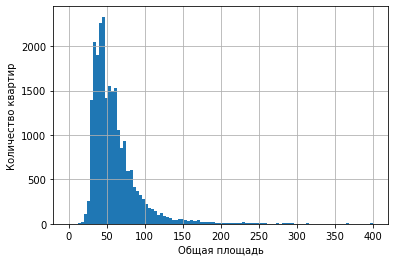

In [23]:
df['total_area'].hist(bins=100,range=(0,400)) #Площадь
pl.xlabel("Общая площадь")
pl.ylabel("Количество квартир")

2. Из гистораммы видно, что больше всего квартир продается за 3-4 млн. руб

Text(0, 0.5, 'Количество квартир')

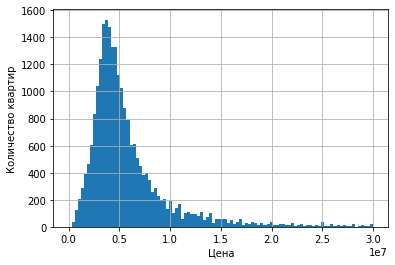

In [24]:
df['last_price'].hist(bins=100, range=(0,30000000)) #Цена
pl.xlabel("Цена")
pl.ylabel("Количество квартир")

3. Больше всего продается 1 -2 комнатных квартир.

Text(0, 0.5, 'Количество квартир')

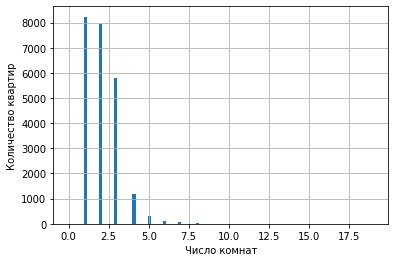

In [25]:
df['rooms'].hist(bins=100, range=(0,19)) #Число комнат
pl.xlabel("Число комнат")
pl.ylabel("Количество квартир")

4. Больше всего продаж квартир с высотой потока 2.6 м

Text(0, 0.5, 'Количество квартир')

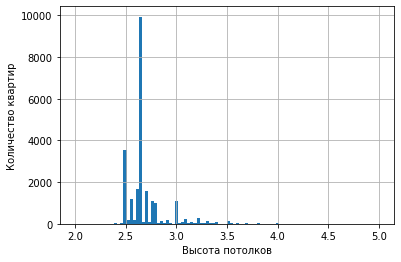

In [26]:
df['ceiling_height'].hist(bins=100, range=(2,5)) #Высота потолков
pl.xlabel("Высота потолков")
pl.ylabel("Количество квартир")

<b> Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану. Опишим, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
 </b>

Больше всего продаж квартир за 90 - 100 дней.

Text(0, 0.5, 'Количество квартир')

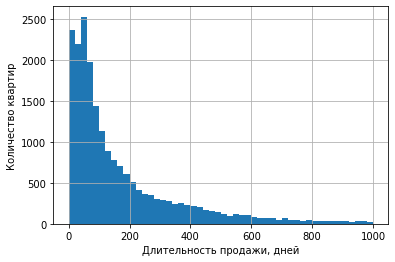

In [27]:
df['days_exposition'].hist(bins=50,range=(0,1000))
pl.xlabel("Длительность продажи, дней")
pl.ylabel("Количество квартир")

In [28]:
df['days_exposition'].describe() #Cреднее время продажи равно 181 дню, медианное - 95 дней.

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [29]:
import matplotlib.pyplot as plt #Импорт библиотеки для построения диаграммы размаха

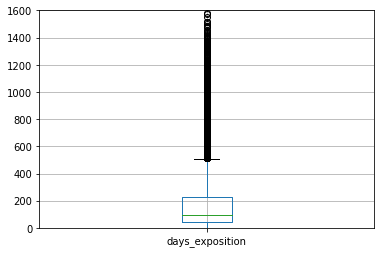

In [30]:
plt.ylim(0,1600)
df.boxplot(column='days_exposition') 
plt.show()

Исследуя гистограмму продаж и диаграмму размаха можно видеть, что медианное значение продажи - 95 дней, большая часть значений лежит за диапазоном 510 дней (1.5 межквартильного размаха).  Это выглядит правдоподобным. Самыми быстрыми продажами можно назвать продажу за один день. 

<b> Исключим редкие и выбивающиеся значения времени продажи квартир. Опишем особенности.</b>

Text(0, 0.5, 'Количество квартир')

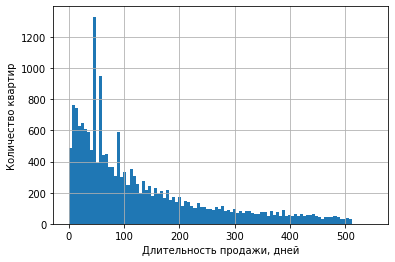

In [31]:
df_new = df.query('days_exposition < 510') # Убрали выбросы находящиеся за 1.5 межквартальным интервалом
df_new['days_exposition'].hist(bins=100,range=(0,550))
pl.xlabel("Длительность продажи, дней")
pl.ylabel("Количество квартир")

Исключили выбросы находящиеся за 1.5 межквартильным интервалом. Всего наблюдается 4 пика. Самый большой пик- 50 дней, есть также пики 95 дней, 70 дней и 10 дней. Данные пики также выглядят правдоподобными, поэтому их нельзя назвать артифактами.

<b> Изучим  другие параметры (высота потолка, площадь, цена)на  наличие в них аномалий.</b>

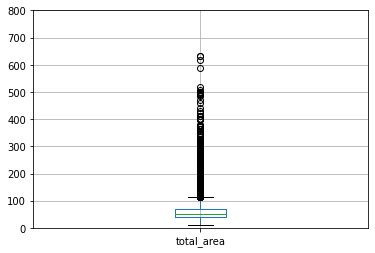

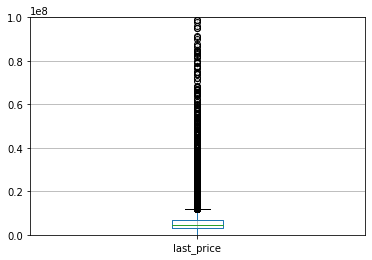

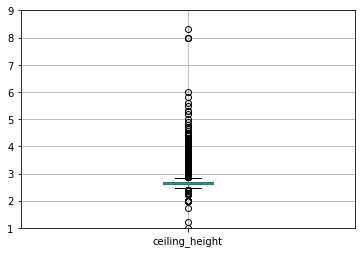

In [32]:
#Общая площадь
plt.ylim(0,800)
df.boxplot(column='total_area') 
plt.show()

#Цена
plt.ylim(0,100000000)
df.boxplot(column='last_price') 
plt.show()

#Высота потолков
plt.ylim(1,9)
df.boxplot(column='ceiling_height') 
plt.show()

In [33]:
df['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

In [34]:
df['last_price'].describe()

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [35]:
df['ceiling_height'].describe()

count    23650.000000
mean         2.724311
std          0.989255
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Разброс значений в столбцах общей площади и цены представляется логичным. В исходной таблице представлены различные обьявления, в том числе и с  нежилыми помещениями (которые не относятся к жилому фонду, но имеют необходимые условия для проживания), поэтому, например, обьявления о продаже квартир как в 12м2 так и в 900 могут иметь место.
В столбце ceiling_height исключим аномалии.


In [36]:
df_new = df.query('2.45 <= ceiling_height <= 2.85')

<b> Изучим какие факторы больше всего влияют на стоимость квартиры. Изучим, зависит ли цена от площади, числа комнат, удалённости от центра. Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучим зависимость от даты размещения: дня недели, месяца и года.</b>

In [37]:
df_new['last_price'].describe() #Обзор данных

count    2.070000e+04
mean     5.557775e+06
std      8.800818e+06
min      1.219000e+04
25%      3.300000e+06
50%      4.400000e+06
75%      6.000000e+06
max      7.630000e+08
Name: last_price, dtype: float64

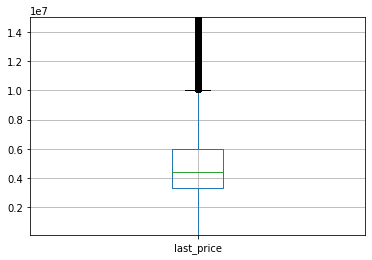

In [38]:
plt.ylim(100000,15000000) #Строим диаграмму размаха
df_new.boxplot(column='last_price')
plt.show()

На диаграмме размаха видно, что в выбросы попадают квартиры свыше 10 млн. руб

Исключим значения начиная с 1.5 межквартального интервала - с 10 млн. руб, правее все стремится к нулю. Кажутся неправильными значения меньше 1.5 млн руб за квартиру в Ленинградской области. Также исключим.

In [39]:
df_new = df_new.query('1500000 < last_price < 10*10**6') # Убрали выбросы 

<AxesSubplot:xlabel='last_price'>

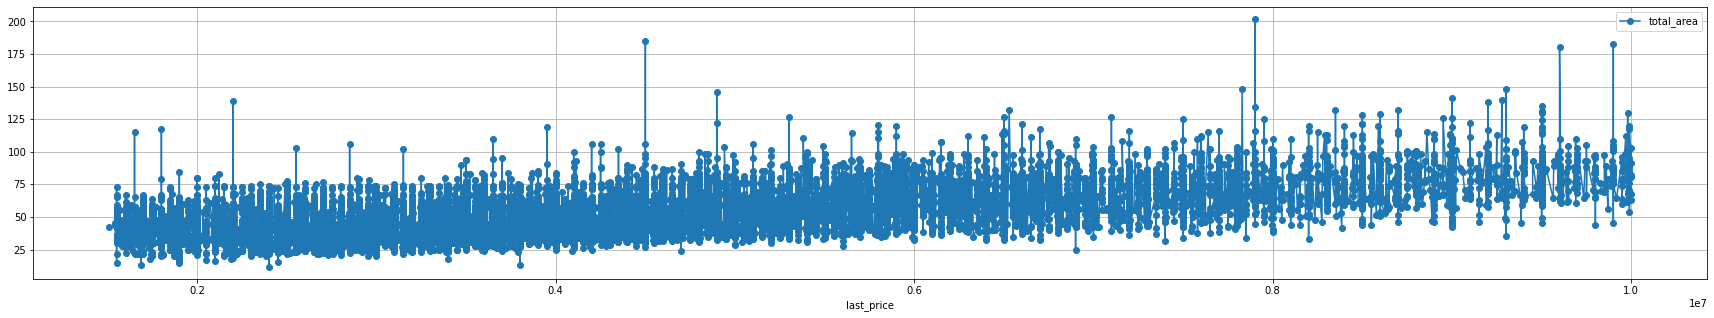

In [67]:
#Зависимость цены от площади
df_new.sort_values(by='last_price',ascending=True).plot(x='last_price',y='total_area',grid=True, style='o-',figsize=(30,5))

In [68]:
df_new['last_price'].corr(df_new['total_area']) #Коэффициент Пирсона

0.6554445798830631

Мы видим, что коэффициент корреляции положительный 0,65, линейная связь есть (но не слишком сильная). Значит с ростом площади растёт и цена.

<AxesSubplot:xlabel='rooms'>

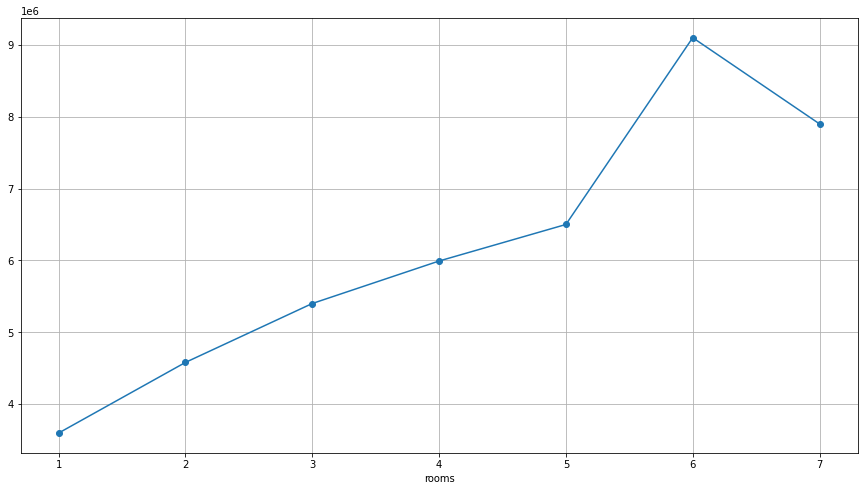

In [42]:
#Зависимость цены от количества комнат
df_new.groupby('rooms')['last_price'].median().plot(x='rooms',y='last_price',style='o-',grid=True,figsize=(15,8),alpha=1)
 

In [69]:
df_new['last_price'].corr(df_new['rooms']) #Коэффициент Пирсона

0.4192884361221751

На  графике видно, что при увеливении кол-ва комнат, увеличивается стоимость. С кол-вом комнат 7, она ниже, значение медианной цены вносит свою корректировку в график.

<AxesSubplot:xlabel='floor_position'>

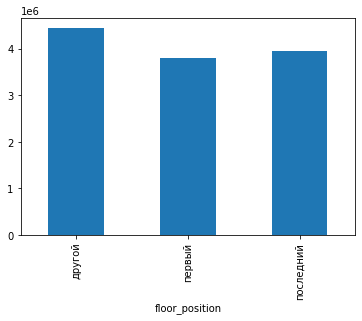

In [44]:
#Зависимость цены от этажа
df_new.groupby('floor_position')['last_price'].median().plot(x='floor_position',y='last_price',kind='bar')


Из гистограммы видно, что цена не сильно зависит от этажа. Видно, что цена за квартиры на первом этаже немного ниже. 

<AxesSubplot:xlabel='last_price'>

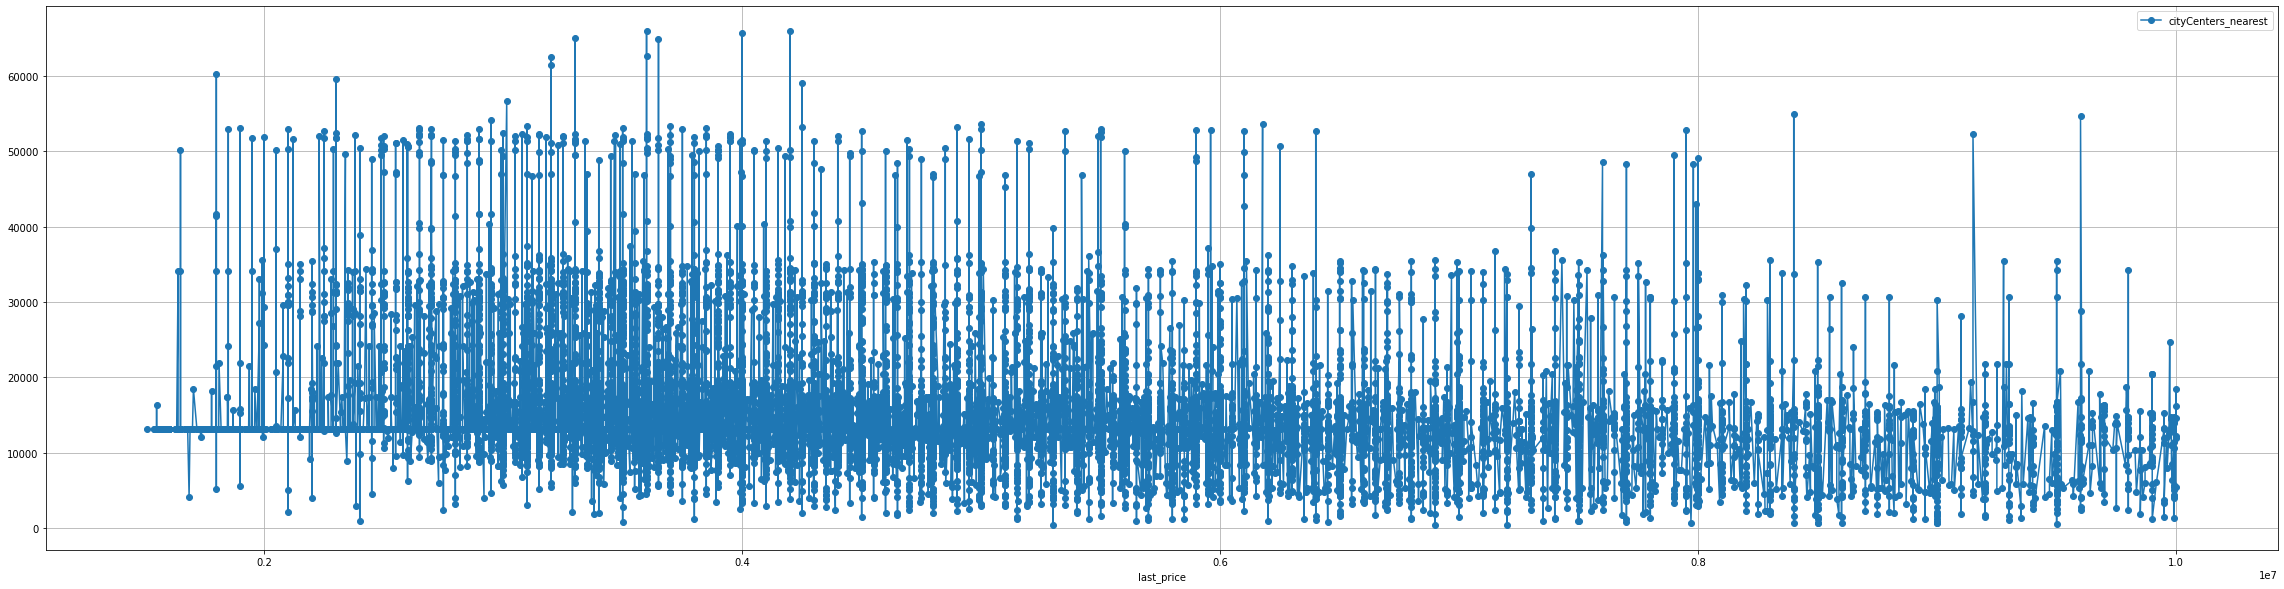

In [45]:
#Зависимость цены от удаленности от центра
df_new.sort_values(by='last_price',ascending=True).plot(x='last_price',y='cityCenters_nearest',grid=True, style='o-',figsize=(40,10))

In [46]:
df_new['last_price'].corr(df_new['cityCenters_nearest']) #Коэффициент Пирсона

-0.1690034794210456

Коэффициент отрицательный, это значит что с ростом цены уменьшается расстояние до центра. Что логично. Связь при этом не сильная, разброс большой, коэффициент Пирсона -0,17.

<AxesSubplot:xlabel='day_of_the_week_exposition'>

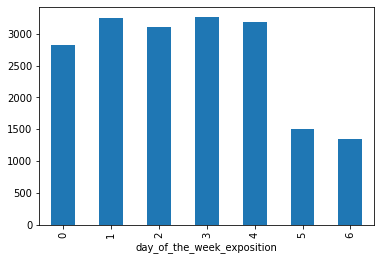

In [47]:
#Зависимость цены от дня недели
df_new.groupby('day_of_the_week_exposition')['last_price'].count().plot(x='day_of_the_week_exposition',y='last_price',kind='bar')

По гистограмме видно, что чаще всего объявления закрываются во вторник, четверг и пятницу. В выходные меньше всего. 

<AxesSubplot:xlabel='month_exposition'>

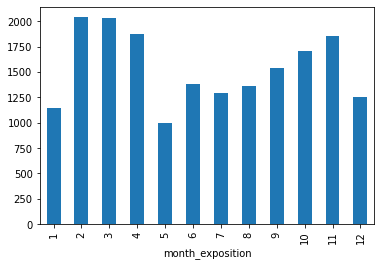

In [48]:
#Зависимость цены от месяца
df_new.groupby('month_exposition')['last_price'].count().plot(x='month_exposition',y='last_price',kind='bar') 

Из гистограммы видно, что объявления  чаще всего закрываются в феврале и марте, меньше всего  в мае и январе - декабре. Возможно, это связано с длительными праздничными днями. 

<AxesSubplot:xlabel='year_exposition'>

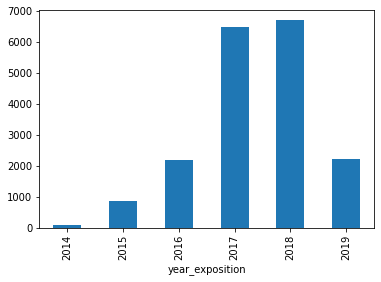

In [49]:
#Зависимость цены от года
df_new.groupby('year_exposition')['last_price'].count().plot(x='year_exposition',y='last_price',kind='bar') 

Больше всего продаж квартир было в 2017 и 2018 году. Меньше всего в 2014-2015.

<b>Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья. </b>

In [74]:
raiting_of_location = df.pivot_table(index='locality_name',values='price_m2',aggfunc=('count','median'))
raiting_of_location.sort_values(by='count',ascending=False).head(10)

,count,median
locality_name,,
Санкт-Петербург,15721,104761.904762
посёлок Мурино,522,85878.462169
посёлок Шушары,440,76876.172608
Всеволожск,398,65789.473684
Пушкин,369,100000.000000
Колпино,338,74723.748474
посёлок Парголово,327,91642.857143
Гатчина,307,67796.610169
деревня Кудрово,299,91860.465116


В Санкт-Петербурге больше всего объявлений и самая высокая стоимость квадратного метра. В Выборге меньше всего объявлений и самая низкая стоимость квадратного метра.

<b>Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге (locality_name). Задача — выяснить, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах. После этого посчитаем среднюю цену для каждого километра. Построим график: он должен показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется, — это и будет центральная зона. </b>

In [75]:
#Создадим столбец с расстоянием до центра в километрах.
df_new['cityCenters_nearest_in_km'] = df_new['cityCenters_nearest']/1000

In [76]:
#Посчитаем среднюю цену для каждого километра
df_new['cost_of_km'] = df_new['last_price']/df_new['cityCenters_nearest_in_km']

<AxesSubplot:xlabel='cityCenters_nearest_in_km'>

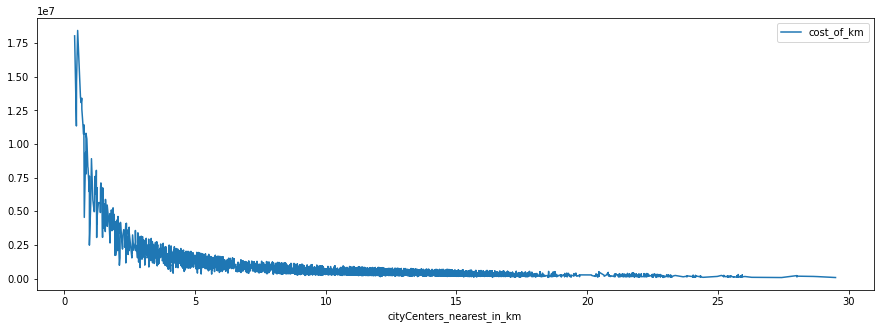

In [77]:
#Построим график как цена зависит от удалённости от центра.
spb = df_new.query('locality_name == "Санкт-Петербург"')
spb.sort_values(by='cityCenters_nearest_in_km',ascending=True).plot(x='cityCenters_nearest_in_km',y='cost_of_km', style='-',figsize=(15,5))

По нему видно, что после 7 км от центра цена почти не меняется.

In [78]:
spb_сenter =spb.query('cityCenters_nearest_in_km < 7')
len(spb)

11665

<b>В центральной зоне Петербурга - 11665 квартир. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Определим, отличаются ли они от общих выводов по всей базе? </b>

<AxesSubplot:>

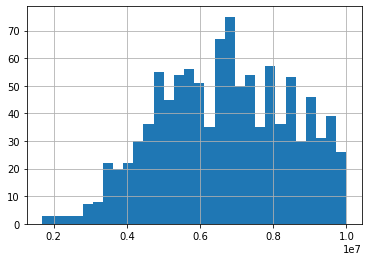

In [79]:
spb_сenter['last_price'].hist(bins=30)

В центральном районе больше всего квартир за 6.5 - 7 млн руб

<AxesSubplot:>

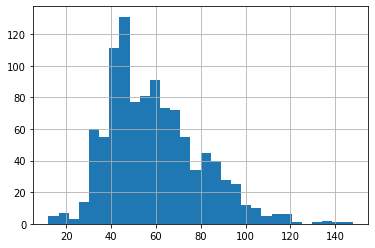

In [80]:
spb_сenter['total_area'].hist(bins=30)

В центральном районе большая часть квартир в 40-50 м2.

<AxesSubplot:>

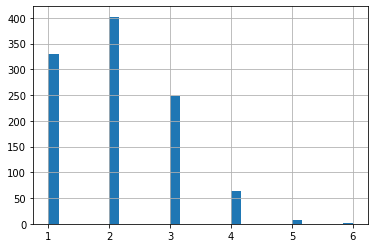

In [81]:
spb_сenter['rooms'].hist(bins=30)

В центральном районе большt всего квартир с 2 комнатами.

<AxesSubplot:>

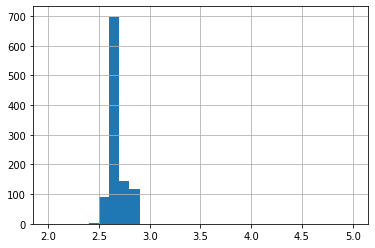

In [82]:
spb_сenter['ceiling_height'].hist(bins=30,range=(2,5))

В центральном районе больше всего продается квартир с высотой потолка 2,6 м

Определим, отличаются ли факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления) в центральной части от общих выводов по всей базе

<AxesSubplot:xlabel='rooms'>

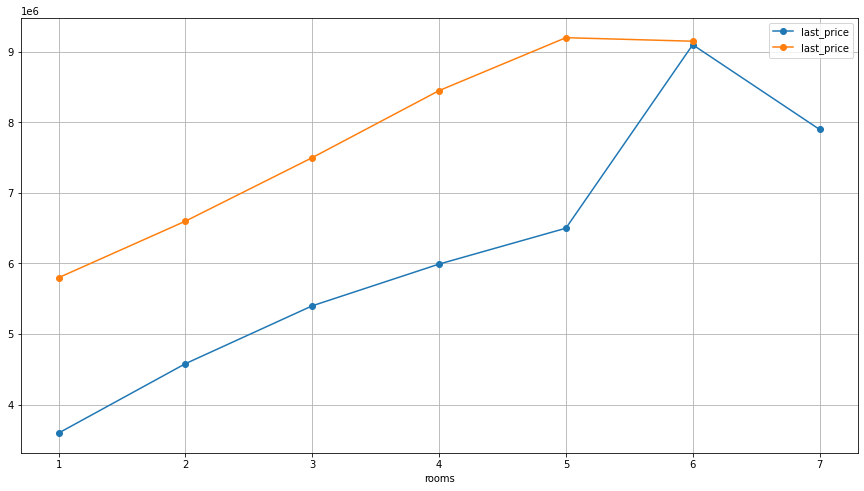

In [84]:
#Зависимость цены от количества комнат
df_new.groupby('rooms')['last_price'].median().plot(x='rooms',y='last_price',style='o-',grid=True,figsize=(15,8),alpha=1, legend=True)

spb_сenter.sort_values(by='last_price',ascending=True).groupby('rooms')['last_price'].median().plot(x='rooms',y='last_price',style='o-',grid=True,figsize=(15,8),legend=True)      


На графике видно, что с увеличением комнат увеличивается стоимость. График квартир в центре сдвинут вверх отностительно общей базы, тк в центре квартиры дороже. 

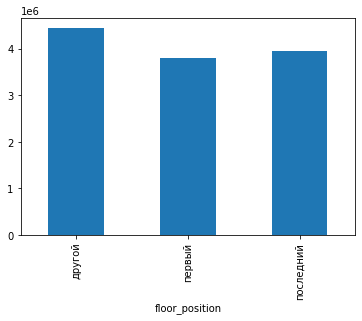

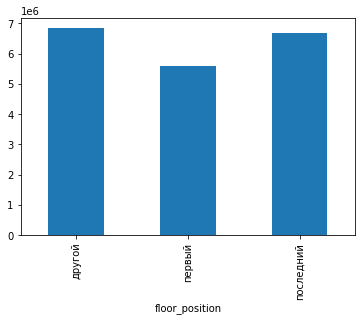

In [85]:
#Зависимость цены от этажа
df_new.groupby('floor_position')['last_price'].median().plot(x='floor_position',y='last_price',kind='bar')

plt.show()

spb_сenter.groupby('floor_position')['last_price'].median().plot(x='floor_position',y='last_price',kind='bar')

plt.show()

Видно, что квартиры в центре и в общей базе на первом этаже покупают реже всего. Наиболее популярны квартиры в катерии "другой".

<AxesSubplot:xlabel='last_price'>

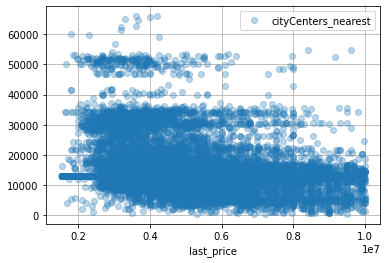

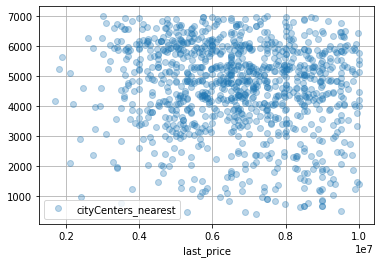

In [87]:
#Зависимость цены от удаленности от центра
df_new.sort_values(by='last_price',ascending=True).plot(x='last_price',y='cityCenters_nearest',grid=True, style='o', alpha=0.3)

spb_сenter.sort_values(by='last_price',ascending=True).plot(x='last_price',y='cityCenters_nearest',grid=True, style='o',alpha=0.3)


В центре больше всего квартир на расстоянии 4-5км и стоят они от 6-8 млн. руб

<AxesSubplot:xlabel='day_of_the_week_exposition'>

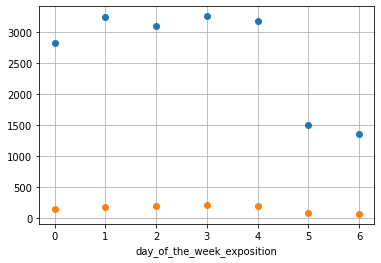

In [88]:
#Зависимость цены от дня недели
df_new.groupby('day_of_the_week_exposition')['last_price'].count().plot(x='day_of_the_week_exposition',y='last_price',grid=True, style='o', alpha=1)

spb_сenter.groupby('day_of_the_week_exposition')['last_price'].count().plot(x='day_of_the_week_exposition',y='last_price',grid=True, style='o', alpha=1)

В центре также в течение недели квартиры продаются примерно одинаково, в выходные меньше.

<AxesSubplot:xlabel='month_exposition'>

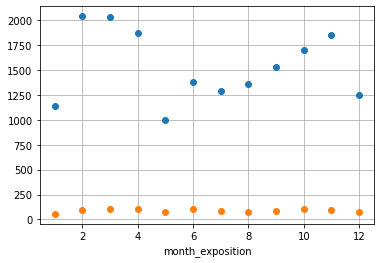

In [89]:
#Зависимость цены от месяца
df_new.groupby('month_exposition')['last_price'].count().plot(x='month_exposition',y='last_price',grid=True, style='o', alpha=1) 

spb_сenter.groupby('month_exposition')['last_price'].count().plot(x='month_exposition',y='last_price',grid=True, style='o', alpha=1) 

В центре квартиры продаются примерно одтинаково по месяцам, нет такого резкого падения продаж в декабре, январе и мае как в общей базе.

<AxesSubplot:xlabel='year_exposition'>

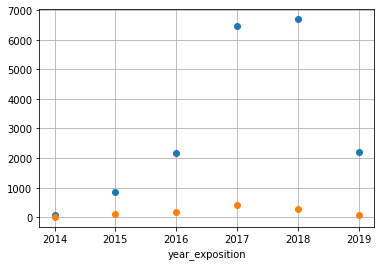

In [90]:
#Зависимость цены от года
df_new.groupby('year_exposition')['last_price'].count().plot(x='year_exposition',grid=True, style='o', alpha=1) 

spb_сenter.groupby('year_exposition')['last_price'].count().plot(x='year_exposition',grid=True, style='o', alpha=1) 

Наибольшие продажи в центре были в 2017-2018 году, как и в общей базе.

### Шаг 5. Общий вывод

В проекте был проанализирован архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет (Данные сервиса Яндекс Недвижимость). 
Произведена предобработка данных: пропущенные значения заполнены/удалены, изменены типы данных.  Также, для анализа данных был добавлен ряд столбцов с ценой за квадратный метр, соотношениями жилой площади к общей и площади кухни к общей, с категорией этажа и т.д.
Изучены следующие параметры: площадь, цена, число комнат, высота потолков, время продажи квартир. Построены диаграммы размаха, исключены аномальные значения.
Изучены  факторы, которые больше всего влияют на стоимость квартиры: площадь, числа комнат, удалённость от центра. Изучена зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучена зависимость от даты размещения: дня недели, месяца и года. 
Выделена центральная часть Санкт-Петербурга - квартиры не далее 7 км от центра. Для этих квартир также была изучена зависимость цены от числа комнат, этажа, удалённости от центра, даты размещения объявления.
Далее, полученныее данные из общей базы сравнивались с даннымти центральной части.

Таким образом, удалось установить, что в обще базе больше всего квартир продается в будние дни,1-2 комнатные квартиры за 3-4 млн.руб, с высотой потолков 2,6м и площадью 45-49м2. Меньше всего квартир покуапют на 1 этаже.  
В центре Петрербурга цены квартир выше, чем в общей базе - 6,5-7 млн.руб. Это также чаще всего 1-2 комнатные квартиры, с высотой потолков 2,6м и площадью 40-50м2. 
Цена кв. зависет от этажа, района, от высоты потолка и от кол-ва комнат. Корреляция этих параметров в центре схожа с квартирами в общей базе.